In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ignore the warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading dataset
data = pd.read_csv('./500_Person_Gender_Height_Weight_Index.csv')

In [4]:
# displaying top-5 rows
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
# descriptive analysis of data
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
# checking for null values
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

#### Data visualization 

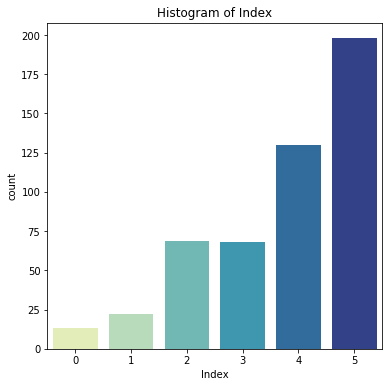

In [8]:
# Index Historgram: Frequency of values falling under each Index [0,1,2,3,4,5]
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(data['Index'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Index")
plt.show()

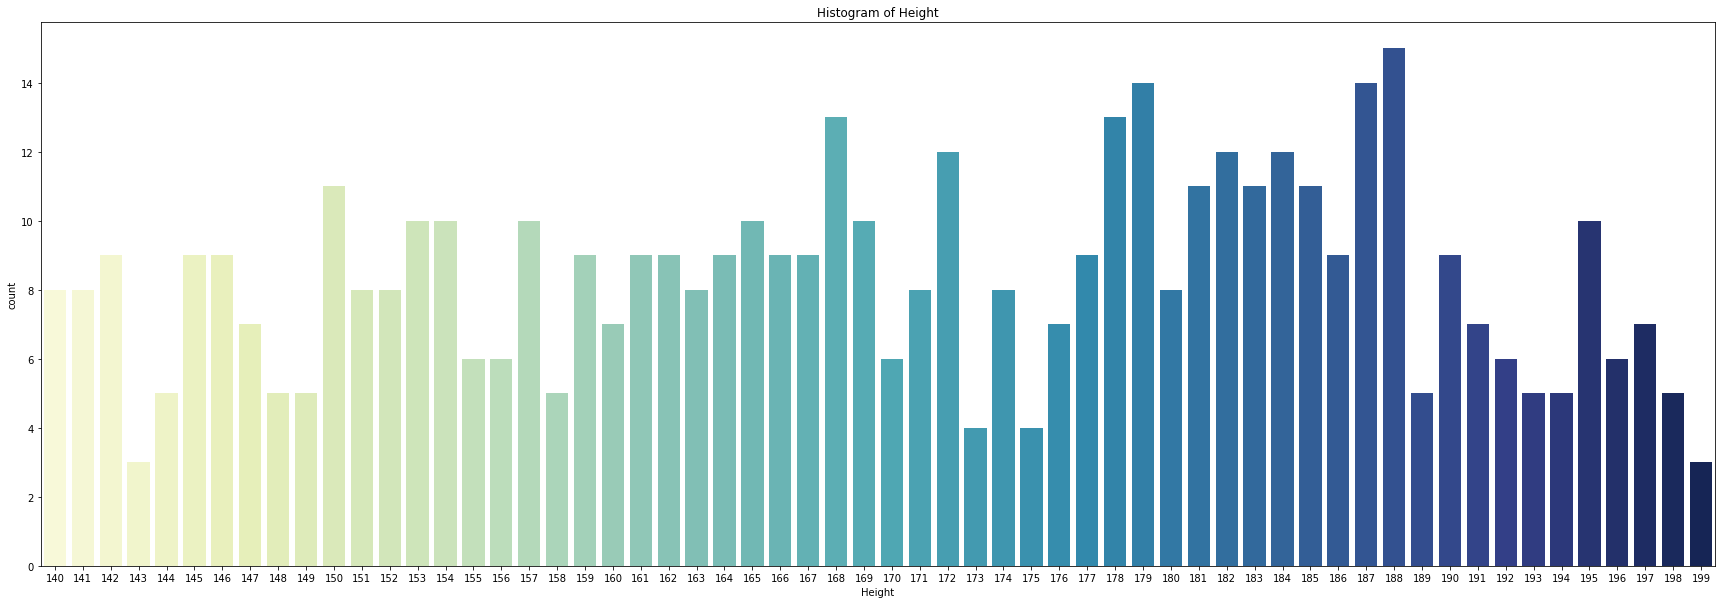

In [9]:
# Height Historgram: Frequency of values falling under certain height intervals
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(data['Height'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Height")
plt.show()

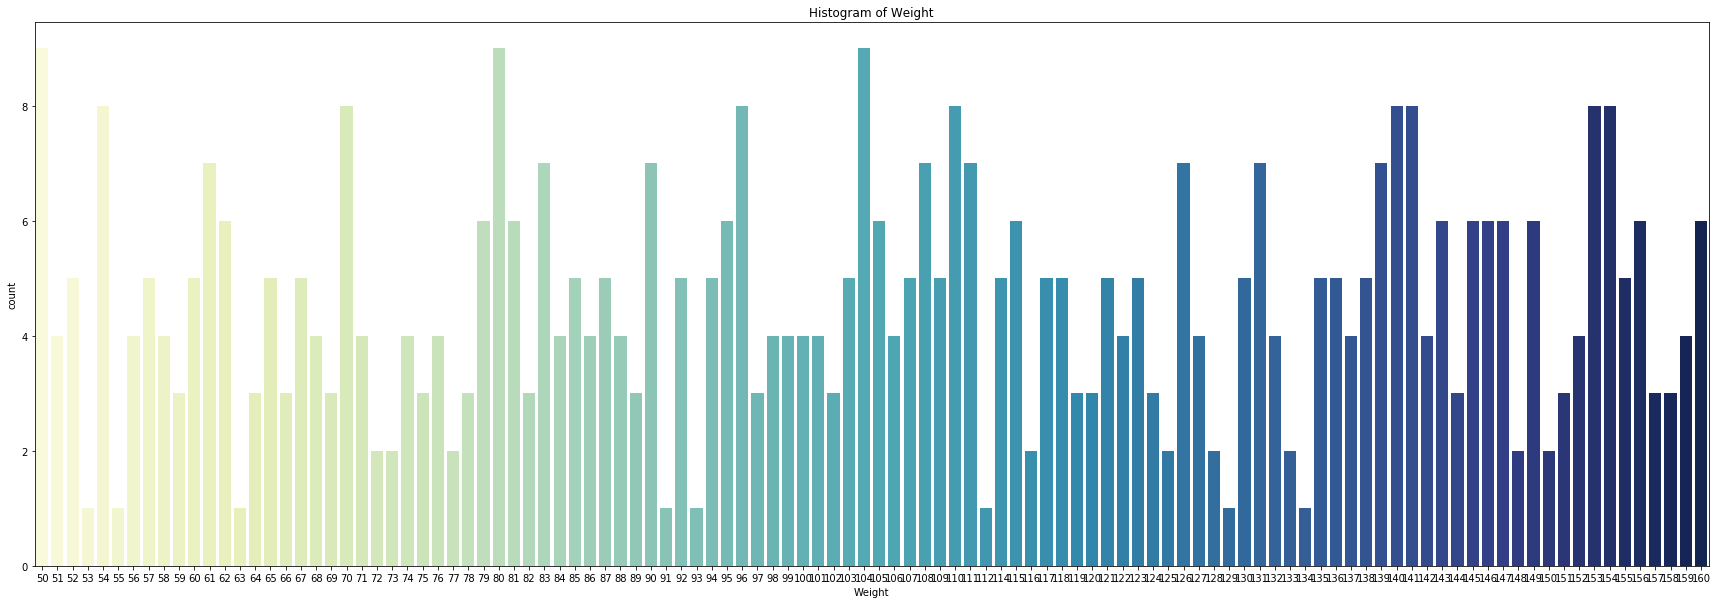

In [10]:
# Weight Historgram: Frequency of values falling under certain weight intervals
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(data['Weight'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Weight")
plt.show()

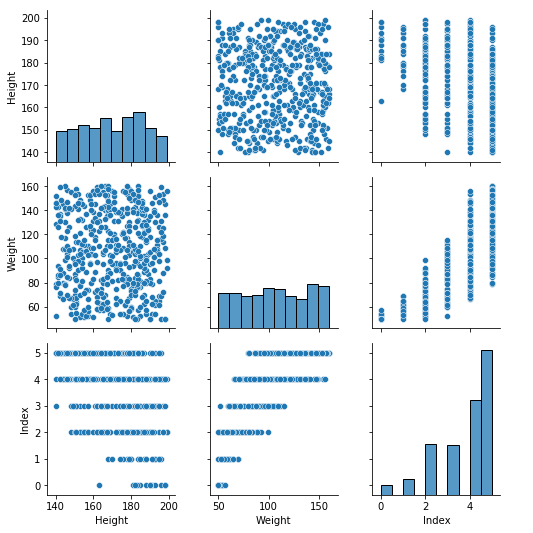

In [11]:
sns.pairplot(data)

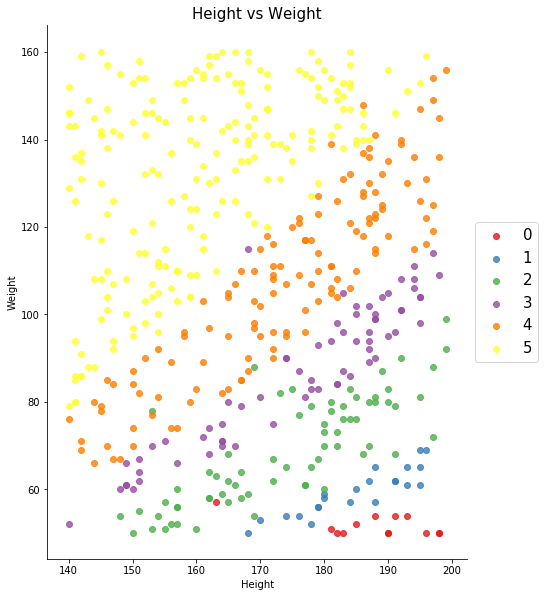

In [17]:
# Trend in Gender based on relationship between Height and Weight
sns.lmplot( x='Height', y='Weight', data=data, 
           fit_reg=False, 
           hue='Index', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])


ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

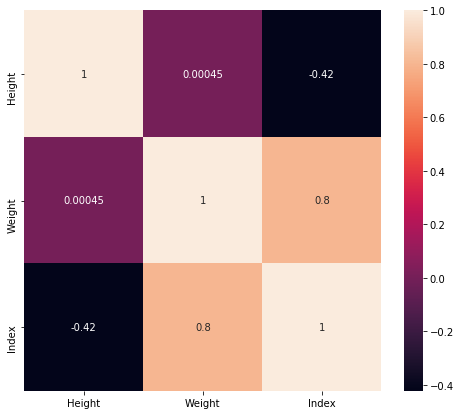

In [13]:
# Provides visual context for correlations via color scale
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(data.corr(), annot=True)
plt.show()

#### Data preparation

In [18]:
# Ordinal Encoding
data["Gender"] = data["Gender"].astype('category')
data["Gender_Enc"] = data["Gender"].cat.codes

,Gender,Height,Weight,Index,Gender_Enc
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


In [19]:
data.head()

,Gender,Height,Weight,Index,Gender_Enc
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


In [20]:
# One Hot Encoding
dummies = pd.get_dummies(data['Gender'])
data = data.join(dummies)

In [21]:
data.head()

,Gender,Height,Weight,Index,Gender_Enc,Female,Male
0,Male,174,96,4,1,0,1
1,Male,189,87,2,1,0,1
2,Female,185,110,4,0,1,0
3,Female,195,104,3,0,1,0
4,Male,149,61,3,1,0,1


In [22]:
# dropping gender columns
data = data.drop(columns=['Male', 'Female'], axis=1)

In [23]:
# Select columns to add to X and y sets
features = list(data.columns.values)
features.remove('Gender')
features.remove('Index')

In [24]:
X = data[features]
y = data['Index']

In [26]:
X.head()

,Height,Weight,Gender_Enc
0,174,96,1
1,189,87,1
2,185,110,0
3,195,104,0
4,149,61,1


In [27]:
y.head()

0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64

#### building model

For making our predictive model we will need to proceed with certain steps:

    Assign our data instances and target value (X and y columns)
    Split data into training and test sets
    Train our model (Deep Forest & Bayesian SVM & RandomForest)
    Test and evaluate the model

In [28]:
# Import required class from sklearn library
from sklearn.model_selection import train_test_split

# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3, test_size=0.15)

In [29]:
X.shape, X_train.shape, X_test.shape

((500, 3), (425, 3), (75, 3))

##### Random Forest

In [32]:
# Import required class from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest classifier with training sets for n_estimators = 100
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Import remaining required classes from sklearn
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.89      0.89      0.89         9
           3       0.71      0.83      0.77         6
           4       0.78      0.86      0.82        21
           5       0.97      0.88      0.92        34

    accuracy                           0.87        75
   macro avg       0.83      0.85      0.84        75
weighted avg       0.87      0.87      0.87        75

Accuracy Score 0.8666666666666667
Error Rate 0.13333333333333333


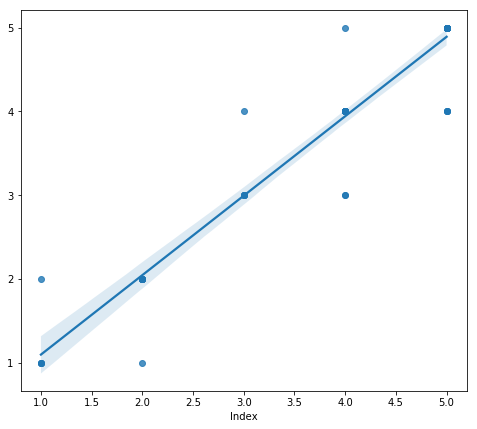

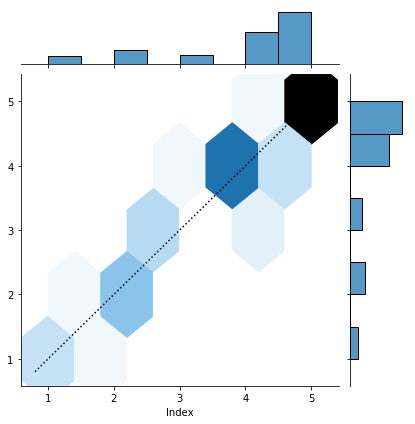

In [36]:
# Test and Evaluate Model
y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

# Get accuracy score
score = np.mean(y_pred == y_test)
print("Accuracy Score", score)

# Get error rate
error = np.mean(y_pred != y_test)
print("Error Rate", error)

sns.regplot(x=y_test, y=y_pred)
plt.show()


fig = sns.jointplot(x=y_test, y=y_pred, kind='hex')
x0, x1 = fig.ax_joint.get_xlim()
y0, y1 = fig.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
fig.ax_joint.plot(lims, lims, ':k')    
plt.show()

##### Deep Forest

In [43]:
X_train

,Height,Weight,Gender_Enc
338,189,125,0
296,169,88,0
340,155,71,0
445,159,140,1
388,157,66,0
...,...,...,...
440,172,116,0
131,187,70,0
249,161,89,1
152,150,60,0


In [44]:
from deepforest import CascadeForestClassifier

cf = CascadeForestClassifier()
cf.fit(np.array(X_train), y_train)

[2022-11-05 05:41:38.193] Start to fit the model:
[2022-11-05 05:41:38.195] Fitting cascade layer = 0 
[2022-11-05 05:41:38.658] layer = 0  | Val Acc = 87.059 % | Elapsed = 0.463 s
[2022-11-05 05:41:38.662] Fitting cascade layer = 1 
[2022-11-05 05:41:39.145] layer = 1  | Val Acc = 86.588 % | Elapsed = 0.483 s
[2022-11-05 05:41:39.145] Early stopping counter: 1 out of 2
[2022-11-05 05:41:39.147] Fitting cascade layer = 2 
[2022-11-05 05:41:39.691] layer = 2  | Val Acc = 85.176 % | Elapsed = 0.544 s
[2022-11-05 05:41:39.691] Early stopping counter: 2 out of 2
[2022-11-05 05:41:39.691] Handling early stopping
[2022-11-05 05:41:39.693] The optimal number of layers: 1


[2022-11-05 05:44:22.495] Start to evalute the model:
[2022-11-05 05:44:22.498] Evaluating cascade layer = 0 
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.89      0.89      0.89         9
           3       0.83      0.83      0.83         6
           4       0.79      0.90      0.84        21
           5       0.97      0.88      0.92        34

    accuracy                           0.88        75
   macro avg       0.86      0.86      0.86        75
weighted avg       0.89      0.88      0.88        75

Accuracy Score 0.88
Error Rate 0.12


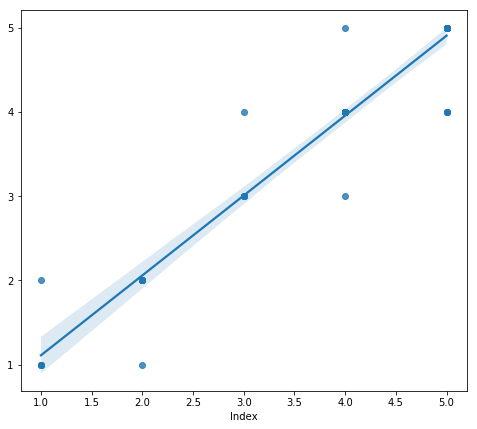

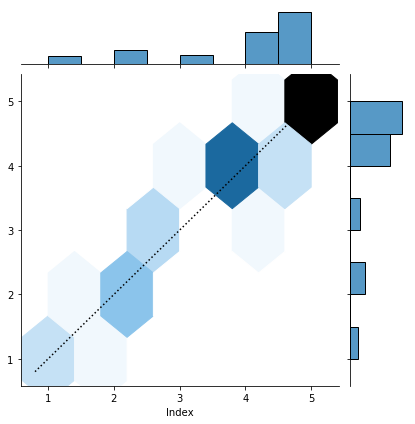

In [45]:
# Test and Evaluate Model
y_pred = cf.predict(X_test)

print(classification_report(y_test,y_pred))

# Get accuracy score
score = np.mean(y_pred == y_test)
print("Accuracy Score", score)

# Get error rate
error = np.mean(y_pred != y_test)
print("Error Rate", error)

sns.regplot(x=y_test, y=y_pred)
plt.show()


fig = sns.jointplot(x=y_test, y=y_pred, kind='hex')
x0, x1 = fig.ax_joint.get_xlim()
y0, y1 = fig.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
fig.ax_joint.plot(lims, lims, ':k')    
plt.show()

##### SVM

In [47]:
from sklearn.svm import SVC

svm = SVC(gamma=0.01,
          C=0.08132774086371929,
          kernel='poly',
          degree=1,
          probability=True)

svm.fit(np.array(X_train), y_train)

SVC(C=0.08132774086371929, degree=1, gamma=0.01, kernel='poly',
    probability=True)

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.89      0.89      0.89         9
           3       0.56      0.83      0.67         6
           4       0.85      0.81      0.83        21
           5       1.00      0.94      0.97        34

    accuracy                           0.88        75
   macro avg       0.82      0.85      0.83        75
weighted avg       0.90      0.88      0.89        75

Accuracy Score 0.88
Error Rate 0.12


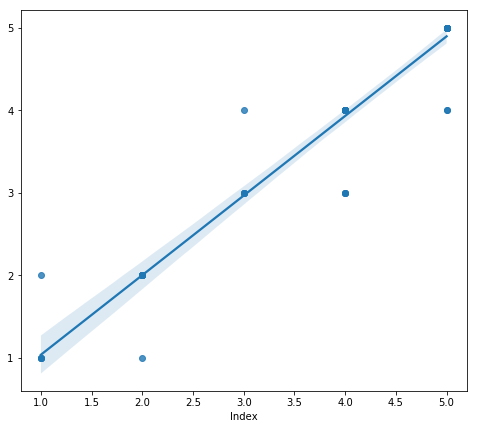

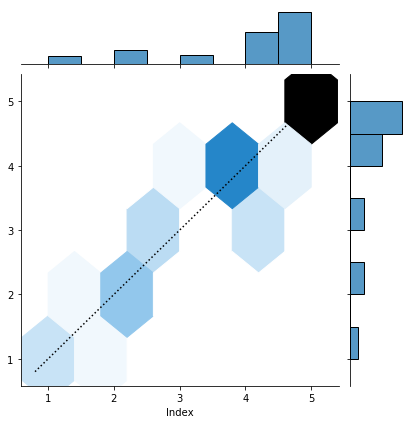

In [50]:
# Test and Evaluate Model
y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))

# Get accuracy score
score = np.mean(y_pred == y_test)
print("Accuracy Score", score)

# Get error rate
error = np.mean(y_pred != y_test)
print("Error Rate", error)

sns.regplot(x=y_test, y=y_pred)
plt.show()


fig = sns.jointplot(x=y_test, y=y_pred, kind='hex')
x0, x1 = fig.ax_joint.get_xlim()
y0, y1 = fig.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
fig.ax_joint.plot(lims, lims, ':k')    
plt.show()